# Materi 2 : Studi Kasus One-Way ANOVA + Implementasi Python

### 2.1. Studi Kasus

Sebuah eksperimen dilakukan untuk mengukur waktu reaksi peserta dalam tiga kondisi berbeda :
- Kondisi A : Ruangan tenang
- Kondisi B : Ruangan berisik
- Kondisi C : Menggunakan headphone noise-canceling

Peneliti ingin mengetahui apakah kondisi lingkungan mempengaruhi rata-rata waktu reaksi.

- H₀ : Tidak ada perbedaan rata-rata waktu reaksi antar kondisi.
- H₁ : Setidaknya ada dua kondisi yang memiliki rata-rata waktu reaksi yang berbeda secara signifikan.

### 2.2. Struktur Data

[dataset.csv](/model/one_way/dataset.csv) terdiri dari:
- `value` : waktu reaksi dalam milidetik
- `treatment` : kategori kondisi (A, B, atau C)

### 2.3. Module & Library

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### 2.4. Membaca Dataset dari File CSV

In [7]:
df = pd.read_csv("/model/one_way/dataset.csv")
df.head()

,value,treatment
0,257.450712,A
1,247.926035,A
2,259.715328,A
3,272.845448,A
4,246.487699,A


### 2.5. Visualisasi Data dengan Boxplot

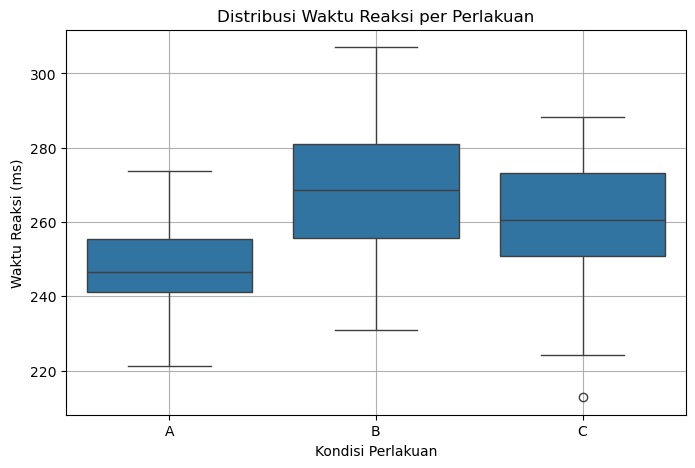

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='treatment', y='value', data=df)
plt.title("Distribusi Waktu Reaksi per Perlakuan")
plt.xlabel("Kondisi Perlakuan")
plt.ylabel("Waktu Reaksi (ms)")
plt.grid(True)
plt.show()

### 2.6. Uji ANOVA

In [9]:
model = ols('value ~ C(treatment)', data=df).fit()
anova_results = anova_lm(model, typ=2)
print("Hasil ANOVA")
print(anova_results)

Hasil ANOVA
                    sum_sq    df          F    PR(>F)
C(treatment)   6404.740682   2.0  11.331025  0.000042
Residual      24587.909809  87.0        NaN       NaN


### 2.7. Interpretasi Output

Dari hasil ANOVA:
- Nilai F-statistic = 11.33
- Nilai p-value = 0.000042 (jauh < 0.05)

Interpretasi:
- Terdapat cukup bukti statistik untuk menolak hipotesis nol (H₀), yang menyatakan bahwa semua rata-rata waktu reaksi sama.
- Artinya, setidaknya satu grup perlakuan (A, B, atau C) memiliki rata-rata yang berbeda secara signifikan dibandingkan grup lainnya.

### 2.8. Uji Lanjutan : Tukey HSD

In [10]:
tukey = pairwise_tukeyhsd(endog=df['value'], groups=df['treatment'], alpha=0.05)
print("Hasil Tukey HSD")
print(tukey)

Hasil Tukey HSD
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   20.399    0.0 10.0487 30.7492   True
     A      C  13.0541 0.0096  2.7039 23.4043   True
     B      C  -7.3448  0.214 -17.695  3.0054  False
----------------------------------------------------


### 2.9. Kesimpulan

- One-Way ANOVA menunjukkan bahwa kondisi eksperimen berpengaruh signifikan terhadap waktu reaksi peserta.
- Uji lanjut Tukey HSD memperkuat temuan dengan menunjukkan pasangan grup yang berbeda nyata.
- Peneliti dapat menyimpulkan bahwa lingkungan (tenang, berisik, noise-canceling) memang memiliki efek terhadap kecepatan respon manusia dalam tugas tertentu.